<a href="https://colab.research.google.com/github/Aishwarya-RaviK/Water-Quality-Classification-model/blob/main/Water_Quality_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Water Quality Classification model**

Water quality is measured by several factors, such as the concentration of dissolved oxygen, bacteria levels, the amount of salt (or salinity), or the amount of material suspended in the water (turbidity). In some bodies of water, the concentration of microscopic algae and quantities of pesticides, herbicides, heavy metals, and other contaminants may also be measured to determine water quality.

Although scientific measurements are used to define water quality, it is not a simple thing to say “that water is good” or “that water is bad.” So, the determination is typically made relative to the purpose of the water – is it for drinking or to wash a car with or for some other purpose?

Poor water quality can pose a health risk for people. Poor water quality can also pose a health risk for ecosystems.

This model helps in classfying water as drinking or non-drinking.

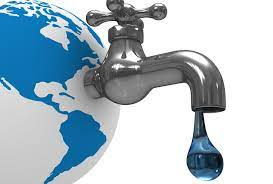

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Reading the data**

In [62]:
df=pd.read_csv("/content/water_potability.csv")

In [63]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# **Description about columns**

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [64]:
df.shape

(3276, 10)

# **Data Cleaning**

In [65]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# **PH Value**

In [66]:
ph_miss=491*100/3276
ph_miss

14.987789987789988

15% data of the ph values are missing , imputing is a possibility, lets see how noisy the data is

In [67]:
df['ph'].describe()

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64

Ph ranges from 0 to 14 

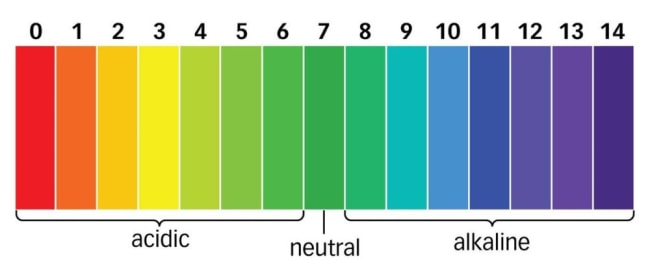

In [68]:
df['ph']=df['ph'].fillna(df['ph'].median())

In [69]:
df.isnull().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# **Hardness**

In [70]:
df['Hardness'].dtype
df['Hardness'].describe()

count    3276.000000
mean      196.369496
std        32.879761
min        47.432000
25%       176.850538
50%       196.967627
75%       216.667456
max       323.124000
Name: Hardness, dtype: float64

In [71]:
q1=np.quantile(df['Hardness'],q=0.25)
q3=np.quantile(df['Hardness'],q=0.75)
iqr=q3-q1 
minimum = q1 - 1.5*iqr 
maximum = q3 + 1.5*iqr 
print(minimum, maximum)

117.12516037150485 276.3928337208903


# **Solids**

In [72]:
df['Solids'].dtype
df['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

In [73]:
q1=np.quantile(df['Solids'],q=0.25)
q3=np.quantile(df['Solids'],q=0.75)
iqr=q3-q1 
minimum = q1 - 1.5*iqr 
maximum = q3 + 1.5*iqr 
print(minimum, maximum)

-1832.4174487462951 44831.86987314956


In [74]:
df['Solids'].isnull().sum()
df['Solids'].isna().any()

False

# **Cholroamines**

In [75]:
df['Chloramines'].dtype 
df['Chloramines'].describe()

count    3276.000000
mean        7.122277
std         1.583085
min         0.352000
25%         6.127421
50%         7.130299
75%         8.114887
max        13.127000
Name: Chloramines, dtype: float64

In [76]:
df['Chloramines'].isnull().sum()
df['Chloramines'].isna().any()

False

In [77]:
q1=np.quantile(df['Chloramines'],q=0.25)
q3=np.quantile(df['Chloramines'],q=0.75)
iqr=q3-q1 
minimum = q1 - 1.5*iqr 
maximum = q3 + 1.5*iqr 
print(minimum, maximum)

3.1462213405647073 11.09608644703562


# **Sulfate**

In [78]:
df['Sulfate'].dtype
df['Sulfate'].isnull().sum()

781

In [79]:
df['Sulfate'].max()
df['Sulfate'].min()
df['Sulfate']=df['Sulfate'].fillna(df['Sulfate'].median())

In [80]:
df['Sulfate'].isnull().sum()
df['Sulfate'].isna().any()

False

# **Conductivity**

In [81]:
df['Conductivity'].isnull().sum()
df['Conductivity'].isna().any()
df['Conductivity'].describe()

count    3276.000000
mean      426.205111
std        80.824064
min       181.483754
25%       365.734414
50%       421.884968
75%       481.792304
max       753.342620
Name: Conductivity, dtype: float64

# **Organic Carbons**

In [82]:
df['Organic_carbon'].dtype 
df['Organic_carbon'].describe() 
df['Organic_carbon'].isnull().sum()
df['Organic_carbon'].isna().any()
df['Organic_carbon'].describe()

count    3276.000000
mean       14.284970
std         3.308162
min         2.200000
25%        12.065801
50%        14.218338
75%        16.557652
max        28.300000
Name: Organic_carbon, dtype: float64

In [83]:
q1=np.quantile(df['Organic_carbon'],q=0.25)
q3=np.quantile(df['Organic_carbon'],q=0.75)
iqr=q3-q1 
minimum = q1 - 1.5*iqr 
maximum = q3 + 1.5*iqr 
print(minimum, maximum)

5.328026018267515 23.295426859188986


# **Trihalomethanes**

In [84]:
df['Trihalomethanes'].isnull().sum()
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df['Trihalomethanes'].median())
df['Trihalomethanes'].isna().any()
df['Trihalomethanes'].describe()

count    3276.000000
mean       66.407478
std        15.769958
min         0.738000
25%        56.647656
50%        66.622485
75%        76.666609
max       124.000000
Name: Trihalomethanes, dtype: float64

In [85]:
q1=np.quantile(df['Trihalomethanes'],q=0.25)
q3=np.quantile(df['Trihalomethanes'],q=0.75)
iqr=q3-q1 
minimum = q1 - 1.5*iqr 
maximum = q3 + 1.5*iqr 
print(minimum, maximum)

26.619225158022296 106.69503986064285


# **Turbidity**

In [86]:
df['Turbidity'].isnull().sum() 
df['Turbidity'].describe() 

count    3276.000000
mean        3.966786
std         0.780382
min         1.450000
25%         3.439711
50%         3.955028
75%         4.500320
max         6.739000
Name: Turbidity, dtype: float64

# **Potability**

In [87]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [88]:
potable=1998*100/df.shape[0]
non_potable=1278*100/df.shape[0]
print(potable, non_potable)

60.989010989010985 39.010989010989015


The datas are in 60-40 ratio so this is a balanced data.

In [89]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

# **Exploratory Data Analysis**

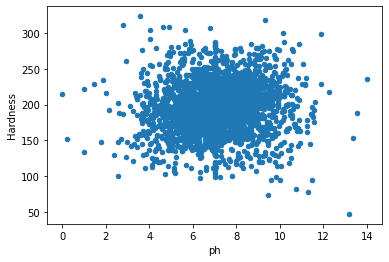

0.0757603026632075

In [90]:
df.plot(x='ph',y='Hardness',kind='scatter')
plt.show()
df['ph'].corr(df['Hardness'])

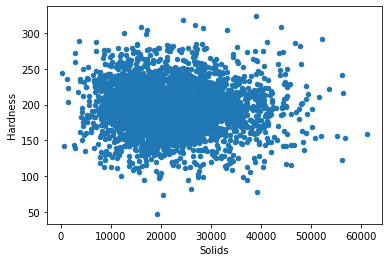

-0.046899365488177656

In [91]:
df.plot(x='Solids',y='Hardness',kind='scatter')
plt.show()
df['Solids'].corr(df['Hardness'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.05 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.05 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.05 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in fav

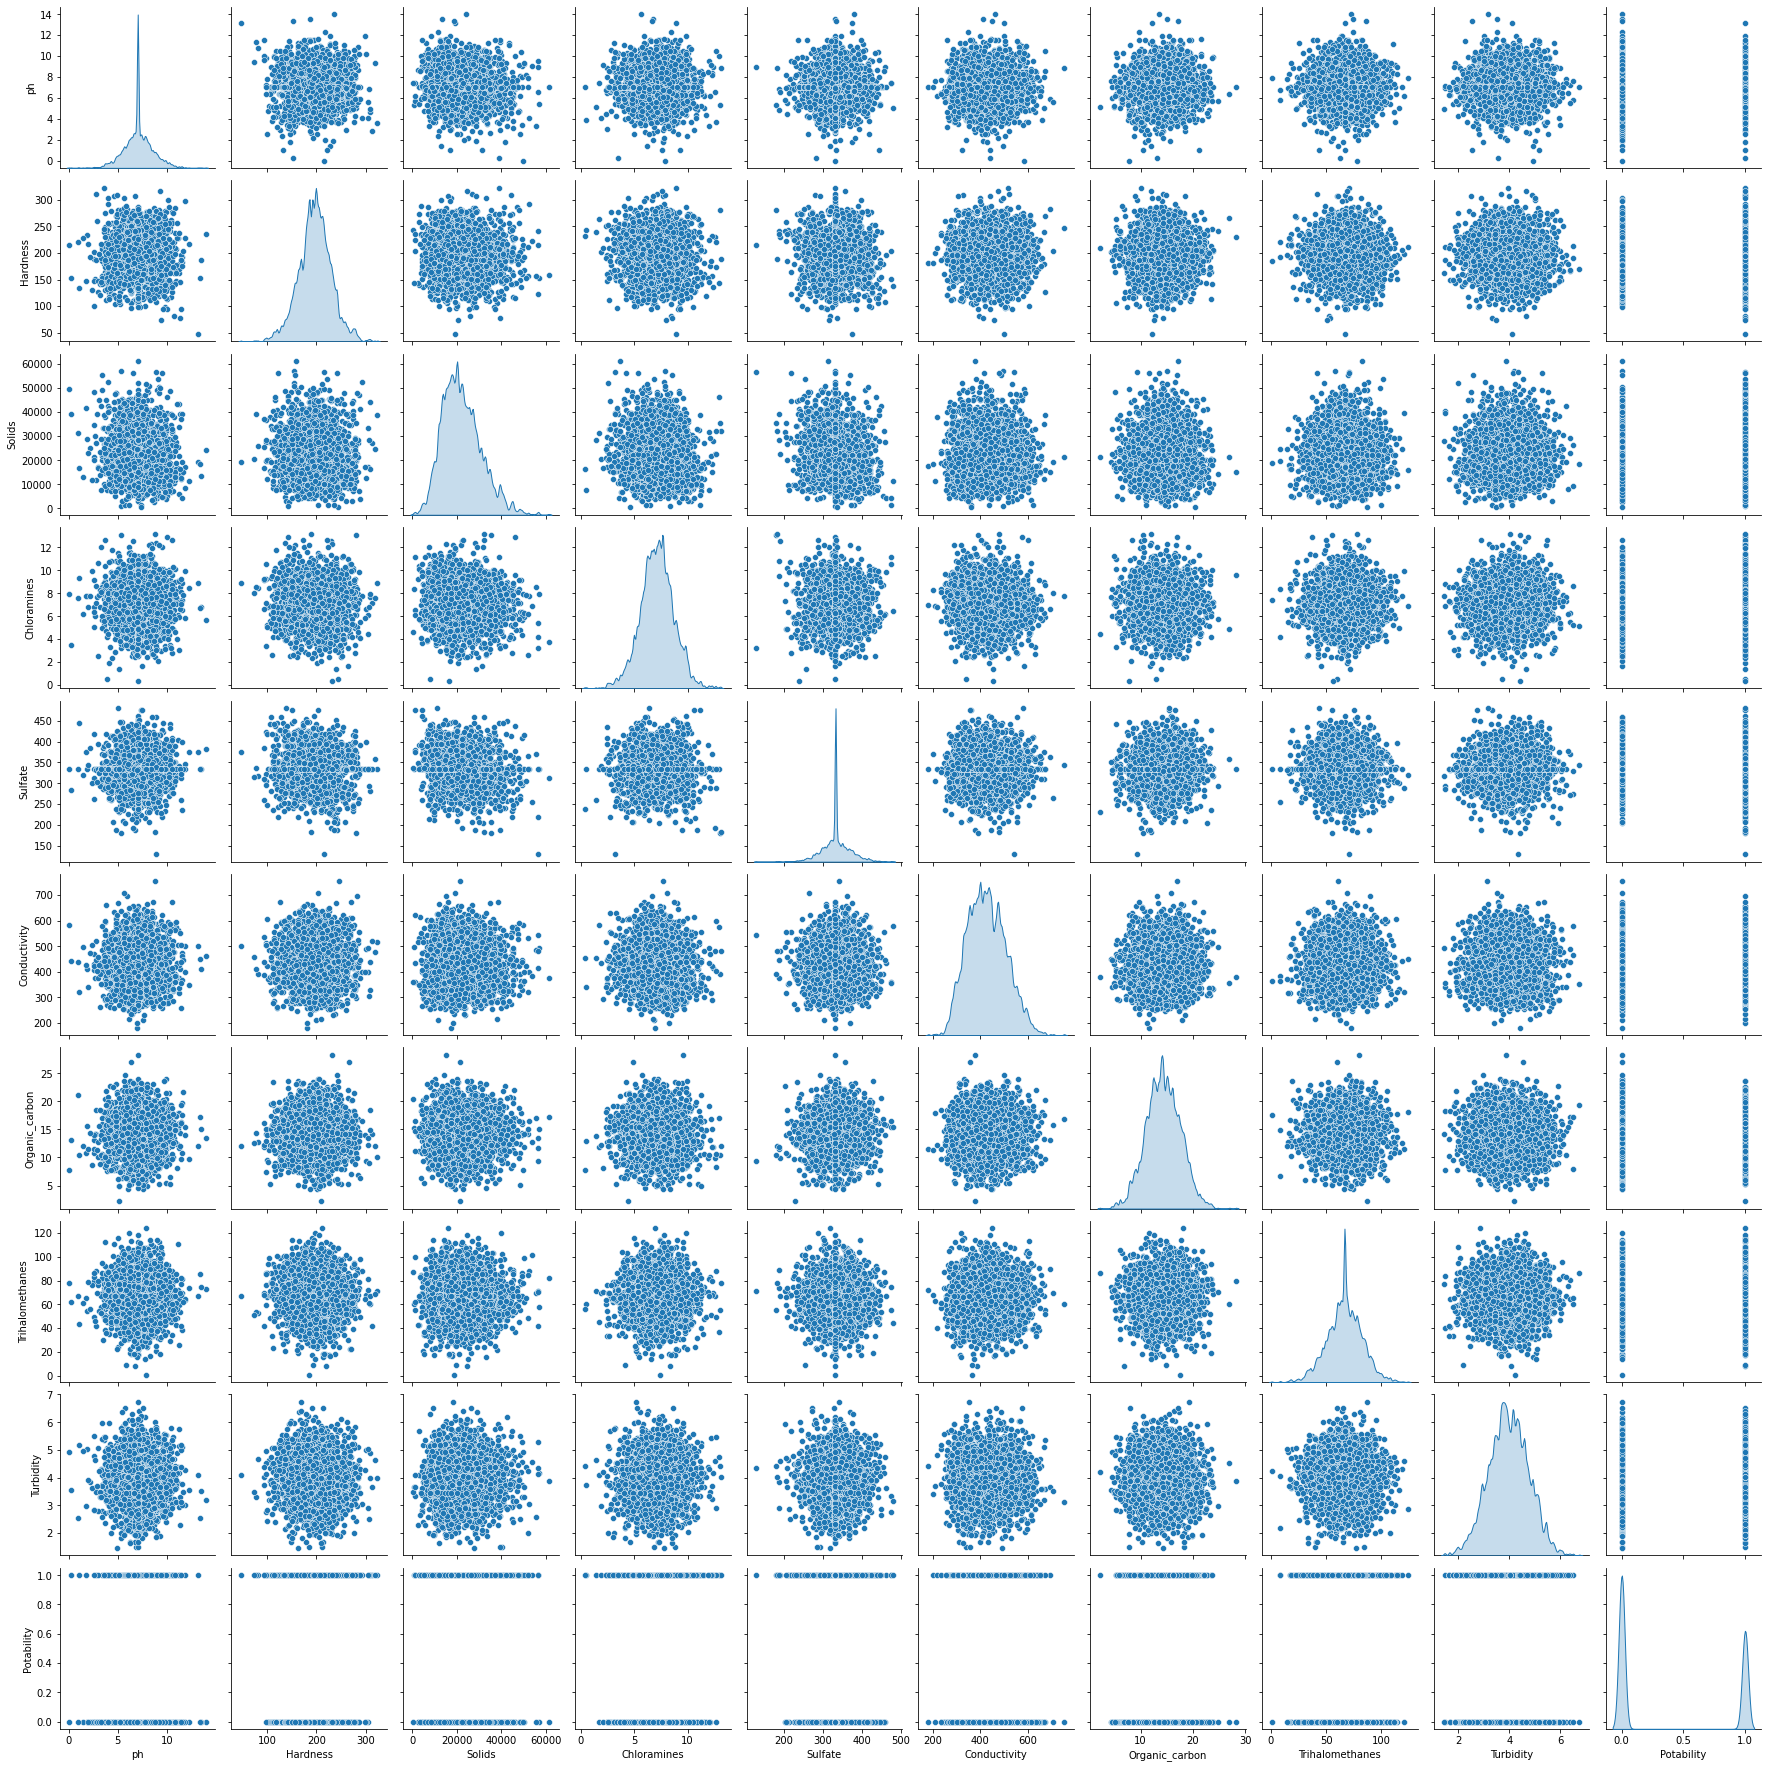

In [92]:
sns.pairplot(df,diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))
plt.show()

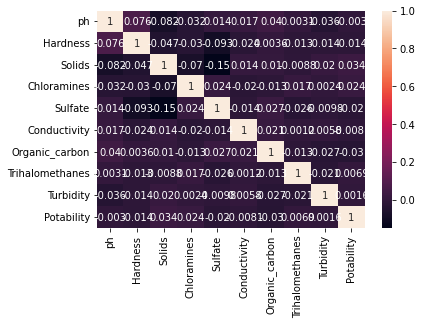

In [93]:
corr=df.corr()
sns.heatmap(corr,annot=True)

# **Splitting Data**

In [94]:
X=df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y=df[['Potability']]

In [95]:
from sklearn.model_selection import train_test_split 
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.25,random_state=4)


# **Scaling Data**

In [96]:
from sklearn.preprocessing import StandardScaler 
scale=StandardScaler() 
#scale.fit(X_train)
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

# **Logistic Regression**

In [97]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [98]:
y_pred=log_reg.predict(X_test)
print(log_reg.coef_)
log_reg.intercept_

[[-0.00264357 -0.02856671  0.05806949 -0.11666992 -0.06277452 -0.14229119
   0.10419971  0.01688532  0.08308284]]


array([-0.49749781])

0.6048026048026048
[[1465   25]
 [ 946   21]]
0.041461006910167825


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


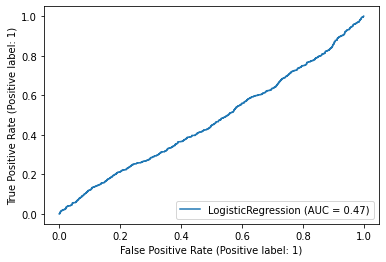

In [99]:
from sklearn.metrics import plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score 
print(log_reg.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(f1_score(y_test,y_pred))
plot_roc_curve(log_reg,X_test,y_test)

# **K Nearest Neighbor Classifier**

In [100]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier(n_neighbors=20).fit(X_train,y_train)
y_pred=knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6275946275946276
[[1412   78]
 [ 837  130]]
0.22127659574468087


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


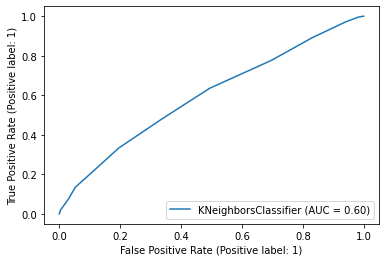

In [101]:
from sklearn.metrics import plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score 
print(knn.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(f1_score(y_test,y_pred))
plot_roc_curve(knn,X_test,y_test)

# **Support Vector Machine**

In [102]:
from sklearn import svm
model=svm.SVC(kernel='rbf',gamma='scale')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


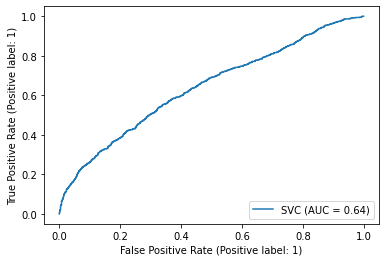

In [103]:
from sklearn.metrics import plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score
model.score(X_test,y_test)
confusion_matrix(y_test,y_pred) 
f1_score(y_test,y_pred)
plot_roc_curve(model,X_test,y_test)

# **Decision Tree**

In [104]:
from sklearn.tree import DecisionTreeClassifier 
model=DecisionTreeClassifier()
model.fit(X_train,y_train) 
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


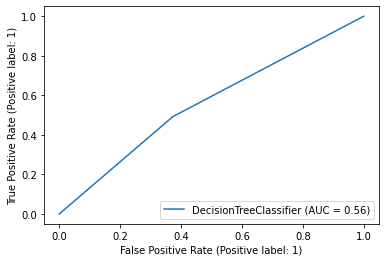

In [105]:
from sklearn.metrics import plot_roc_curve,f1_score,confusion_matrix,roc_auc_score
model.score(X_test,y_test)
confusion_matrix(y_test,y_pred) 
f1_score(y_test,y_pred)
plot_roc_curve(model,X_test,y_test)